In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import pystan
%matplotlib inline

В шапке доля золотых монет равна $p$. Априорно верим, что $p \sim U[0;1]$. Извлекли первую — золотая (1), извлекли вторую — золотая (1). Как выглядит апостериорное распределение $p$?

$$
f(p|data) = \frac{f(data|p)f(p)}{f(data)} \prop f(data|p)f(p) = p^2 \cdot 1
$$

Из условия $\int f(p|data) \, dp = 1$ находим пропущенный сомножитель, 
$$
f(p|data) = 3p^2
$$

Теперь в STAN!

In [10]:
coins_data = {'N' : 2, 'y' : [1, 1]}

In [11]:
coins_fit = pystan.stan(
  file="/Users/boris/Documents/pr201/2016/shapka.stan",
  data=coins_data,
  chains=4, iter=1000)

График апостериорной плотности:

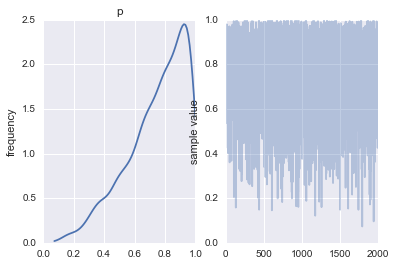

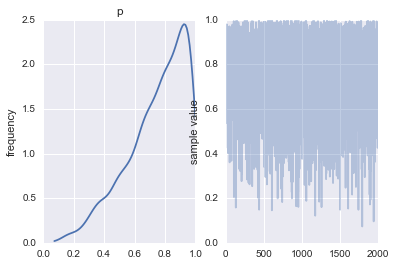

In [12]:
coins_fit.plot()

In [7]:
coins_fit

Inference for Stan model: anon_model_2bb514ef7bc143d46488cf9bb0d101b1.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p      0.75  5.7e-3   0.19   0.28   0.64   0.79   0.91   0.99   1153    1.0
lp__  -2.85    0.03   0.83  -5.12  -3.03  -2.51   -2.3  -2.25    786    1.0

Samples were drawn using NUTS at Mon Feb 27 13:13:03 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [14]:
coins_array = coins_fit.extract()

Вытащим выборку параметра $p$:

In [20]:
p = coins_array["p"]

Несколько первых значений:

In [24]:
p[0:20]

array([ 0.89138591,  0.81147276,  0.93446048,  0.73625041,  0.83417783,
        0.69231783,  0.76708235,  0.82258334,  0.84185113,  0.65912425,
        0.53743708,  0.96716191,  0.87590252,  0.97860133,  0.95717009,
        0.65375454,  0.8753876 ,  0.91519867,  0.94678825,  0.97064753])

Апостериорное среднее:

In [21]:
np.mean(p)

0.74849171097829847

Апостериорная медиана:

In [22]:
np.median(p)

0.79008906890612685

Апостериорная вероятность $P(p > 0.7 | data)$:

In [23]:
np.mean(p > 0.7)

0.65600000000000003

/Users/boris/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


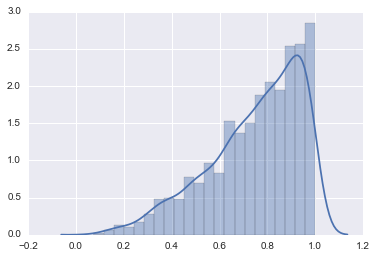

In [30]:
sns.distplot(p)

На рисунке хорошо видно, что убывающая часть оценённой функции плотности — это просто особенность сглаживания :)

In [31]:
pwd

'/Users/boris/Documents/sc401/2016_icef/comission'